In [20]:
quality = read.csv("./data/quality.csv")
str(quality)

'data.frame':	131 obs. of  14 variables:
 $ MemberID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ InpatientDays       : int  0 1 0 0 8 2 16 2 2 4 ...
 $ ERVisits            : int  0 1 0 1 2 0 1 0 1 2 ...
 $ OfficeVisits        : int  18 6 5 19 19 9 8 8 4 0 ...
 $ Narcotics           : int  1 1 3 0 3 2 1 0 3 2 ...
 $ DaysSinceLastERVisit: num  731 411 731 158 449 ...
 $ Pain                : int  10 0 10 34 10 6 4 5 5 2 ...
 $ TotalVisits         : int  18 8 5 20 29 11 25 10 7 6 ...
 $ ProviderCount       : int  21 27 16 14 24 40 19 11 28 21 ...
 $ MedicalClaims       : int  93 19 27 59 51 53 40 28 20 17 ...
 $ ClaimLines          : int  222 115 148 242 204 156 261 87 98 66 ...
 $ StartedOnCombination: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ AcuteDrugGapSmall   : int  0 1 5 0 0 4 0 0 0 0 ...
 $ PoorCare            : int  0 0 0 0 0 1 0 0 1 0 ...


In [21]:
table(quality$PoorCare)


 0  1 
98 33 

### 基准模型

预测所有人都接受到好的治疗，会有75%的准确率。分类问题中的基准模型常常以这种形式出现。

In [22]:
98/(98+33)

[1] 0.7480916

### 切分数据

随机切分数据，使得训练集和测试集中均有75%的病人接受到好的治疗。

In [23]:
library("caTools")

`TRUE`表明被放在训练集，反之被放在测试集。

In [24]:
set.seed(88)
split = sample.split(quality$PoorCare, SplitRatio=0.75)
split

[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25] FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
 [37] FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
 [49] FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
[109]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[121] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE

In [25]:
qualityTrain = subset(quality, split==TRUE)
qualityTest = subset(quality, split==FALSE)

- `glm`：general linear model
- `family=binomial`：logistic regression

In [26]:
QualityLog = glm(PoorCare ~ OfficeVisits + Narcotics, data=qualityTrain, family=binomial)
summary(QualityLog)


Call:
glm(formula = PoorCare ~ OfficeVisits + Narcotics, family = binomial, 
    data = qualityTrain)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.06303  -0.63155  -0.50503  -0.09689   2.16686  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.64613    0.52357  -5.054 4.33e-07 ***
OfficeVisits  0.08212    0.03055   2.688  0.00718 ** 
Narcotics     0.07630    0.03205   2.381  0.01728 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111.888  on 98  degrees of freedom
Residual deviance:  89.127  on 96  degrees of freedom
AIC: 95.127

Number of Fisher Scoring iterations: 4


两个自变量的系数都是正的。由于

$$Odds = \frac{P(y=1)}{P(y=0)}$$

并且

$$P(y=1)=\frac{1}{1+exp(-z)}$$

其中

$$z = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + ...$$

因此

$$Logit = log(Odds) = log(exp(z)) = z$$

由于回归系数为正，因此`OfficeVisits`和`Narcotics`的增大会增大坏治疗的概率。此外，关注`AIC`。它是衡量模型质量的一个指标，它通过惩罚多余变量而避免过拟合。`AIC`只能用于不同模型在相同数据集上的比较。

下面使用模型进行预测，`type=response`用于返回概率。

In [27]:
predictTrain = predict(QualityLog, type="response")
summary(predictTrain)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06623 0.11910 0.15970 0.25250 0.26760 0.98460 

看上去，对于那些真的是坏治疗的情况，模型给出了相应的预测。

In [28]:
tapply(predictTrain, qualityTrain$PoorCare, mean)

0         1 
0.1894512 0.4392246

### Quick Question

In [29]:
QualityLog2 = glm(PoorCare ~ StartedOnCombination + ProviderCount, data=qualityTrain, family=binomial)
summary(QualityLog2)


Call:
glm(formula = PoorCare ~ StartedOnCombination + ProviderCount, 
    family = binomial, data = qualityTrain)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.61826  -0.72782  -0.64555  -0.08407   1.94662  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -2.00097    0.55097  -3.632 0.000282 ***
StartedOnCombinationTRUE  1.95230    1.22342   1.596 0.110541    
ProviderCount             0.03366    0.01983   1.697 0.089706 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111.89  on 98  degrees of freedom
Residual deviance: 104.37  on 96  degrees of freedom
AIC: 110.37

Number of Fisher Scoring iterations: 4


### 将概率转换为确定值

当概率大于阈值`t`时，预测为坏治疗，否则预测为好治疗。如何选择阈值`t`取决于哪种误差更好。如果`t`很大，则“好治疗”的误差很大，可以用于发现接受最差治疗的病人。反之，“坏治疗”的误差很大，可以用于发现接受最好治疗的病人。如果没有偏好，就设为0.5好了。

### 分类矩阵

|            | Predicted = 0  | Predicted = 1  |
|------------|----------------|----------------|
| Actual = 0 | True Negative (TN)  | False Positive (FP) |
| Autual = 1 | False Negative (FN) | True Positive (TP)  |   

- 阈值高，预测是好治疗时也很可能是坏治疗，`FN`大，则`Sensitivity`低；预测是坏治疗时基本很难有好治疗，`FP`小，`Specificity`高。

- 阈值低，预测是好治疗时很难有坏治疗，`FN`小，则`Sensitivity`高；预测是坏治疗时也很可能有好治疗，`FP`大，`Specificity`小。

$$Sensitivity = \frac{TP}{TP+FN}$$

$$Specificity = \frac{TN}{TN+FP}$$

下面检验这一分析结果。

In [30]:
table(qualityTrain$PoorCare, predictTrain > 0.5)

   
    FALSE TRUE
  0    70    4
  1    15   10

In [31]:
10/25

[1] 0.4

In [32]:
70/74

[1] 0.9459459

In [33]:
table(qualityTrain$PoorCare, predictTrain > 0.7)

   
    FALSE TRUE
  0    73    1
  1    17    8

In [34]:
8/25

[1] 0.32

In [35]:
73/74

[1] 0.9864865

In [36]:
table(qualityTrain$PoorCare, predictTrain > 0.2)

   
    FALSE TRUE
  0    54   20
  1     9   16

In [37]:
16/25

[1] 0.64

In [38]:
54/74

[1] 0.7297297

### 阈值选择

使用**Receiver Operator Characteristic curve**来决定何种阈值是最佳的。**ROC**曲线中，灵敏度作为y轴变量，(1 - 特异性)作为x轴变量。

- ROC总以(0, 0)作为起点，对应阈值为1。这时，`TP = 0`，因此敏感度为0；相应的，特异性为1。
- ROC总以(1, 1)作为起点，对应阈值为0。

用R画出ROC。

`install.packages("ROCR", repos = "http://cran.us.r-project.org")`

In [39]:
library("ROCR")

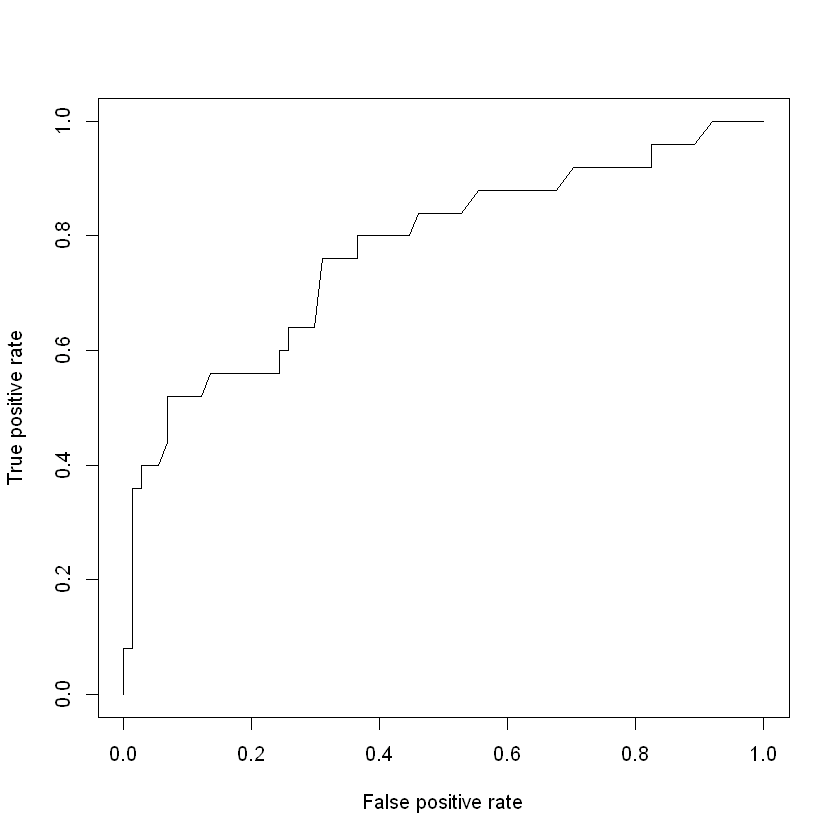

In [40]:
ROCRpred = prediction(predictTrain, qualityTrain$PoorCare)
# performance
ROCRperf = performance(ROCRpred, "tpr", "fpr")
plot(ROCRperf)

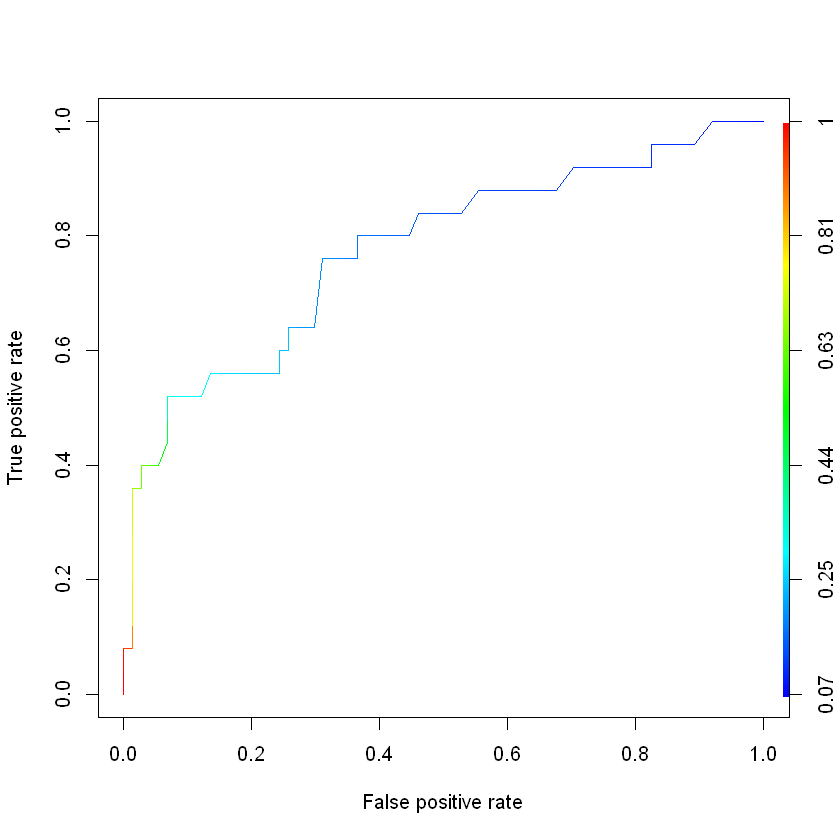

In [17]:
plot(ROCRperf, colorize=TRUE)

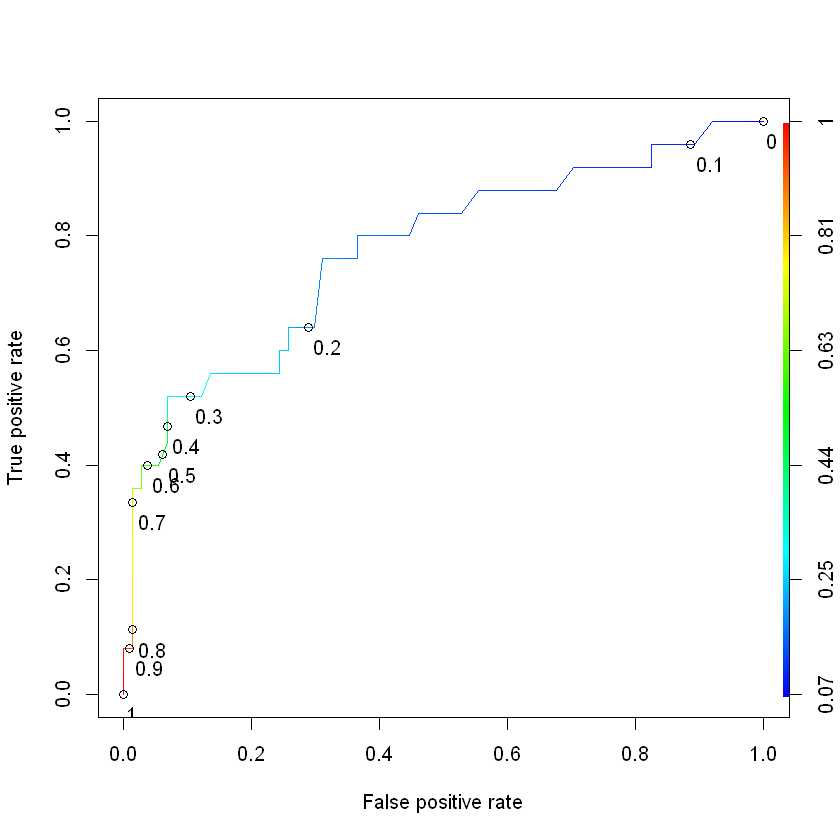

In [18]:
plot(ROCRperf, colorize=TRUE, print.cutoffs.at=seq(0,1,0.1), text.adj=c(-0.2,1.7))

### Quick Question

In [19]:
predictTest = predict(QualityLog, type="response", newdata=qualityTest)
ROCRpredTest = prediction(predictTest, qualityTest$PoorCare)
auc = as.numeric(performance(ROCRpredTest, "auc")@y.values)
auc

[1] 0.7994792

### AUC

> The AUC of a model has the following nice interpretation: given a random patient from the dataset who actually received poor care, and a random patient from the dataset who actually received good care, the AUC is the perecentage of time that our model will classify which is which correctly.

### ROC与AUC

参考文献：http://alexkong.net/2013/06/introduction-to-auc-and-roc/

再次考察分类矩阵。

|            | Predicted = 0  | Predicted = 1  |
|------------|----------------|----------------|
| Actual = 0 | True Negative (TN)  | False Positive (FP) |
| Autual = 1 | False Negative (FN) | True Positive (TP)  |   

- Positive：预测为1，即预测为正类。
- Negative：预测为0，即预测为负类。
- True：预测与实际相符。
- False：预测与实际不相符。

再次考察ROC曲线。由定义，y轴是灵敏度，x轴是（1 - 特异性）。为什么这么定义？

- 灵敏度高则说明若实际为1（生病），则预测也为1的比重大，说明漏诊率低。

$$Sensitivity = \frac{TP}{TP+FN}$$

- 特异性低则说明若实际为0（健康），则预测为1的比重大，说明误诊率高。

$$Specificity = \frac{TN}{TN+FP}$$

一个好的医疗模型应该有漏诊率低和误诊率低的特点，因此选用灵敏度和（1 - 特异性）作为ROC曲线的横纵坐标是合理的，反映出漏诊和误诊之间的一个取舍关系。灵敏度（y）高时，漏诊率低，说明判定“生病”的标准比较松，因此比较可能出现误诊（把健康的判作生病的），即误诊率高，即特异性低，即x高。因此ROC曲线大致是向右上方倾斜的，如下图。

此外，y轴也可以称作TP率（发现病人），x轴也可以称作FP率（代表误诊）。总的来说，发现病人的概率越大，误诊的可能就越大，原因在于“尺子”松了。“尺子”松对应的是阈值小。

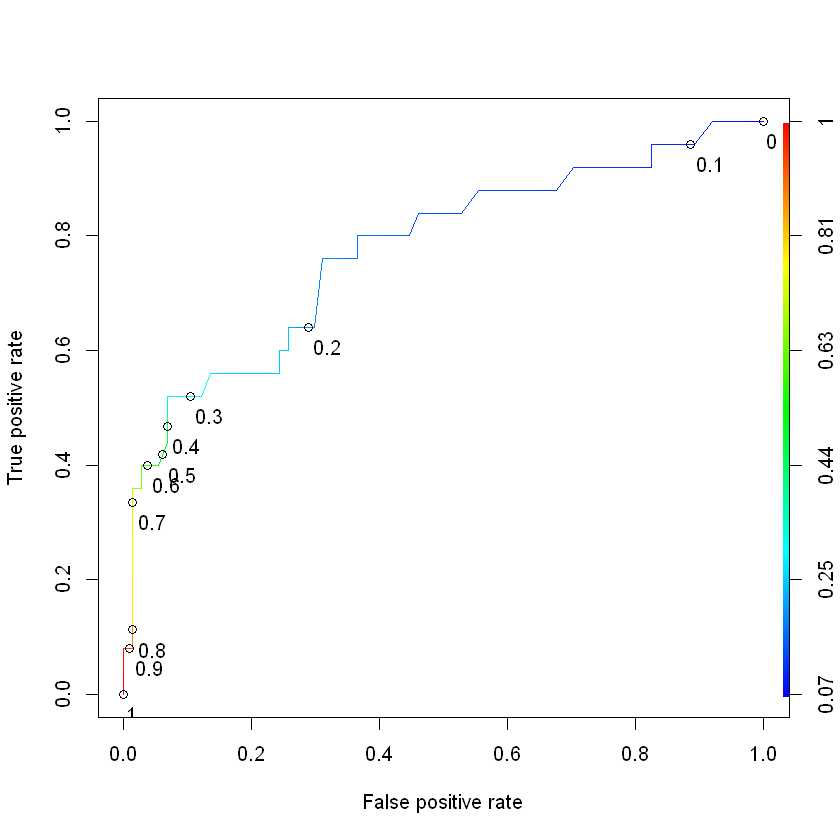

In [42]:
plot(ROCRperf, colorize=TRUE, print.cutoffs.at=seq(0,1,0.1), text.adj=c(-0.2,1.7))

考虑ROC曲线图中的四个角。

- **(0, 1)**:发现病人的概率是1，而误诊率是0，显然这是一个完美的分类器，将所有病人都正确分类。
- **(1, 0)**:发现病人的概率是0，而误诊率是1，这个垃圾分类器避开了所有正确答案。
- **(0, 0)**:TP = FP = 0,把所有样本都预测为负样本（把所有病人都视为健康）。
- **(1, 0)**:把所有样本都预测为正样本。

因此，ROC曲线越靠近左上角，分类器越好。位于(0.5, 0.5)的分类器表明，无论实际情况如何，永远猜测为正类，即随机猜测策略。

再次考察AUC。AUC被定义为ROC曲线下的面积，通常大于0.5（因为ROC曲线通常在对角线之上）而小于1。重点问题是，**AUC值的含义是什么？**

> The AUC value is equivalent to the probability that a randomly chosen positive example is ranked higher than a randomly chosen negative example.(Fawcett, 2006)

并没有很清楚。